In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

%matplotlib inline
sns.set(style="darkgrid")
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)


def get_data(symbol):
    df = pd.read_parquet(f"/data/stocks/{symbol}_1min.parquet.gzip")
    return df

main = get_data("ACC")
df = main.query('20190826 == date')
# main.date.dt.year
df

# d = main.groupby('date')
# main = main.drop('volume',1)
# main.plot(x='date')

,date,open,high,low,close,volume


In [19]:
df = main.copy()
df['date'] = pd.to_datetime(df['datetime'])
df['date'] = df['date'].dt.strftime('%Y-%d-%m')
dates = df.date.unique()
df.head(15)

# df1['date'] = pd.to_datetime(df1['datetime'])
# df1['date'] = df1['date'].dt.strftime('%Y-%d-%m')
# df1.set_index(df1['date'], inplace = True)
# g = df1.groupby(df1['date'])


# df.head()
# df.datetime.dt.
dates

d = df[df['date'] == '2016-08-06']
d

,high,open,datetime,volume,close,low,time,date
8232772,1254.80,1252.70,2016-06-08 03:45:00+00:00,10922.0,1253.00,1252.60,1.465358e+09,2016-08-06
8232773,1253.90,1252.75,2016-06-08 03:46:00+00:00,16747.0,1253.90,1252.55,1.465358e+09,2016-08-06
8232774,1254.35,1254.30,2016-06-08 03:47:00+00:00,8500.0,1254.30,1253.15,1.465358e+09,2016-08-06
8232775,1254.45,1254.30,2016-06-08 03:48:00+00:00,9674.0,1253.95,1253.55,1.465358e+09,2016-08-06
8232776,1253.90,1253.90,2016-06-08 03:49:00+00:00,16359.0,1252.90,1252.10,1.465358e+09,2016-08-06
...,...,...,...,...,...,...,...,...
8233142,1259.85,1259.80,2016-06-08 09:55:00+00:00,17332.0,1258.90,1258.90,1.465380e+09,2016-08-06
8233143,1259.00,1259.00,2016-06-08 09:56:00+00:00,19791.0,1257.35,1257.30,1.465380e+09,2016-08-06
8233144,1257.85,1257.65,2016-06-08 09:57:00+00:00,10697.0,1257.80,1257.35,1.465380e+09,2016-08-06
8233145,1258.00,1257.80,2016-06-08 09:58:00+00:00,34786.0,1254.75,1254.00,1.465380e+09,2016-08-06


In [57]:
def convert_to_24(date):
    l = list(date)
    if (int("".join(l[11:13])) in (1,2,3,4)):
        nStr = str(int(l[12])+12)
        l[11] = nStr[0]
        l[12] = nStr[1]
    return "".join(l)

    
convert_to_24("2016-06-08 09:55:00+00:00")
convert_to_24("2016-06-08 11:00:00+00:00")
convert_to_24("2016-06-08 10:25:00+00:00")
convert_to_24("2016-06-08 12:00:00+00:00")
convert_to_24("2016-06-08 03:00:00+00:00")
convert_to_24("2016-06-08 03:30:00+00:00")

2016-06-08 09:55:00+00:00
2016-06-08 11:00:00+00:00
2016-06-08 10:25:00+00:00
2016-06-08 12:00:00+00:00
2016-06-08 15:00:00+00:00
2016-06-08 15:30:00+00:00


'2016-06-08 15:30:00+00:00'

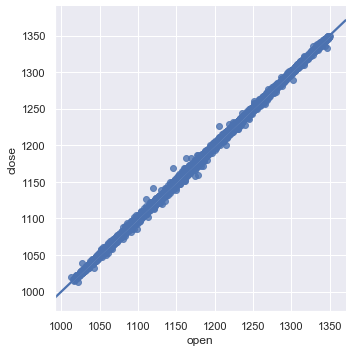

In [3]:
sns.lmplot(x='open', y='close', data=df)

In [25]:
from datetime import datetime
from pytz import timezone

date_str = "2019-08-26 23:48:00"
datetime_obj = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
datetime_obj_utc = datetime_obj.replace(tzinfo=timezone('US/Eastern'))
print(datetime_obj_utc.strftime("%Y-%m-%d %H:%M:%S"))

now_asia = datetime_obj_utc.astimezone(timezone('Asia/Kolkata'))
print(now_asia.strftime(format))

AttributeError: 'str' object has no attribute 'strftime'

In [42]:
from datetime import datetime
from pytz import timezone


newyork = timezone('America/New_York').localize(datetime.strptime("2019-08-26 23:48:00", "%Y-%m-%d %H:%M:%S"))
berlin = newyork.astimezone(timezone('Asia/Kolkata')).replace(tzinfo=None)
print(berlin)


2019-08-27 09:18:00
